<a href="https://colab.research.google.com/github/Luca-wirthner/2024_Geoinformatique_I/blob/main/Exercices-SIG/w09-2-sig-prog/cartopy-tuto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction à Cartopy 🌍

Cartopy est un module Python qui permet de créer des visualisations cartographiques de manière simple et rapide. Bien qu'il ne remplace ni un processus cartographique complet ni un système d'information géographique (SIG), il est très utile pour certains types de cartes.

Son principal avantage réside dans :
- **La rapidité** de création des cartes 🕒
- **La transparence** du processus : chaque étape est accessible grâce au code, ce qui facilite la personnalisation et la reproductibilité.

Cartopy vous permet ainsi de concevoir des cartes efficaces en quelques lignes de code seulement !

## 1. Installation de Cartopy

Cartopy étant un module Python non standard, il faut s'assurer qu'il est installé dans notre environnement Python. Si nécessaire, on peut l'installer avec:

In [1]:
!pip install cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 43.5 MB/s eta 0:00:00


*Remarque:* Cartopy nécessite que certaines librairies sont présentes sur le système (dont GEOS ou Proj). L'installation va échouer si ces dépendances ne sont pas présentes.

## 2. Importation des bibliothèques 📚

Cartopy est généralement utilisé avec Matplotlib pour la création et la gestion des graphiques. Nous chargeons également `pyproj`, qui est nécessaire pour travailler avec certains systèmes de coordonnées spécifiques.

In [2]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

## 3. Une première carte simple 🗺️

Chaque carte nécessite une projection. Ici, la carte sera une visualisation Matplotlib que nous pouvons créer facilement avec `plt.subplots()` :

NB : Dans cet exemple, nous utilisons la projection [**Eckert IV**](https://en.wikipedia.org/wiki/Eckert_IV_projection), une projection pseudocylindrique équivalente (qui préserve les surfaces), ce qui est particulièrement utile pour les cartes thématiques où la comparaison des superficies est essentielle.

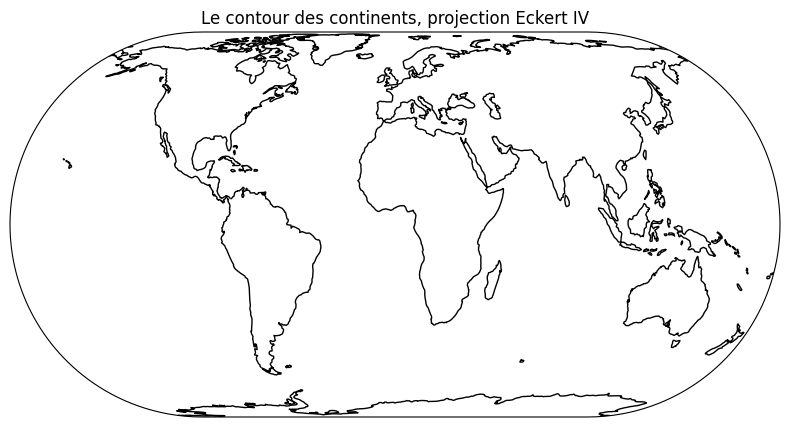

In [6]:
# Créer une figure avec une projection Eckert IV
fig, ax = plt.subplots(
    figsize=(10, 5),  # Taille de la figure en pouces
    subplot_kw={'projection': ccrs.EckertIV()}  # Projection cartographique Eckert IV
)

# Définir le titre de la carte
ax.set_title("Le contour des continents, projection Eckert IV")

# Ajouter les lignes de côte pour les continents
ax.coastlines()

# Afficher la carte
plt.show()

## 4. Un peu de contenu... 🌐

Ajoutons quelques éléments supplémentaires à la carte. Cartopy permet d'ajouter des couches de base, facilement accessibles via `cartopy.feature`. Ces couches incluent des éléments géographiques provenant de [Natural Earth](https://www.naturalearthdata.com/), une source de données cartographiques libre.

Lors du premier appel, Cartopy téléchargera automatiquement les données nécessaires, ce qui générera un message de confirmation.


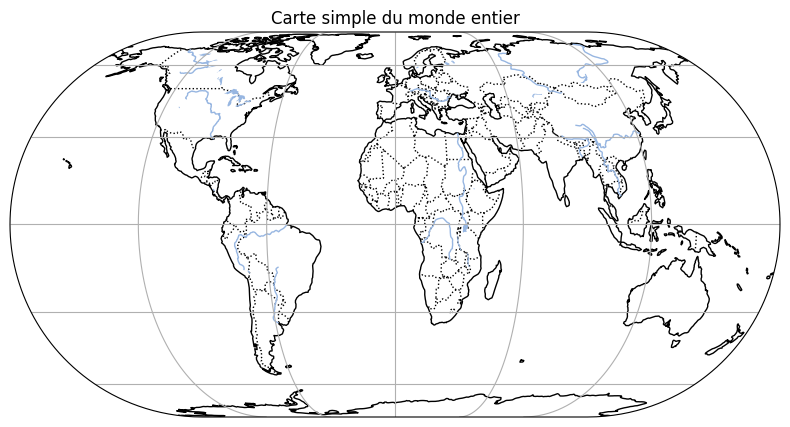

In [7]:
# Créer une figure avec une projection Eckert IV
fig, ax = plt.subplots(
    figsize=(10, 5),  # Taille de la figure en pouces
    subplot_kw={'projection': ccrs.EckertIV()}  # Projection cartographique Eckert IV
)

# Définir le titre de la carte
ax.set_title("Carte simple du monde entier")

# Ajouter les lignes de côte pour les continents
ax.coastlines()

# Ajouter des couches supplémentaires : frontières, lacs et rivières
ax.add_feature(cfeature.BORDERS, linestyle=':')  # Frontières en pointillés
ax.add_feature(cfeature.LAKES)  # Afficher les lacs
ax.add_feature(cfeature.RIVERS)  # Afficher les rivières

# Ajouter les graticules (lignes de latitude et longitude)
ax.gridlines()

# Afficher la carte
plt.show()

## 5. Personnaliser la projection et le style 🎨

Chaque élément de la carte peut être personnalisé avec des paramètres supplémentaires. Par exemple, nous pouvons modifier le méridien central de la projection pour recentrer la carte sur l'Australie, créant ainsi une perspective plus appropriée pour cette région et une carte plus réaliste.

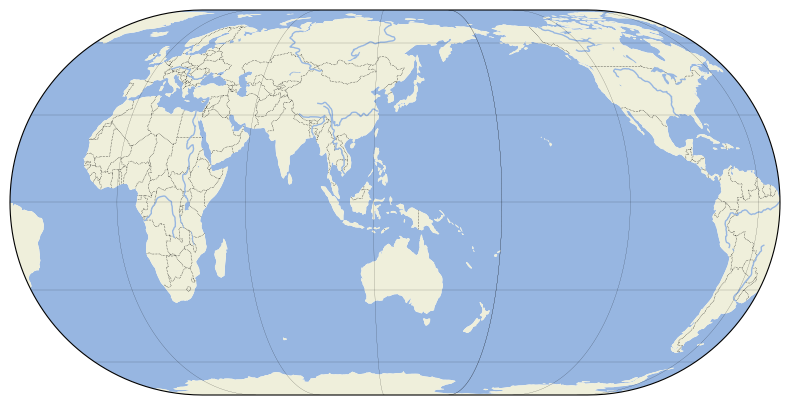

In [8]:
# Créer une figure avec une projection Eckert IV, recentrée sur le méridien central 130°E
fig, ax = plt.subplots(
    figsize=(10, 5),  # Taille de la figure en pouces
    subplot_kw={'projection': ccrs.EckertIV(central_longitude=130)}  # Projection Eckert IV centrée sur 130°E
)

# Ajouter des éléments géographiques de base à la carte
ax.add_feature(cfeature.OCEAN, facecolor=cfeature.COLORS['water'])  # Colorer les océans
ax.add_feature(cfeature.LAND, facecolor=cfeature.COLORS['land'])  # Colorer les terres
ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='#000', linewidth=0.4)  # Frontières en pointillés
ax.add_feature(cfeature.LAKES)  # Afficher les lacs
ax.add_feature(cfeature.RIVERS)  # Afficher les rivières

# Ajouter les graticules (lignes de latitude et longitude), sans étiquettes
ax.gridlines(draw_labels=False, color='black', linewidth=0.1)

# Afficher la carte
plt.show()

## 6. Ajouter quelques points

Nous pouvons ajouter des points, par exemple sur la base des coordonnées pour une série de villes.

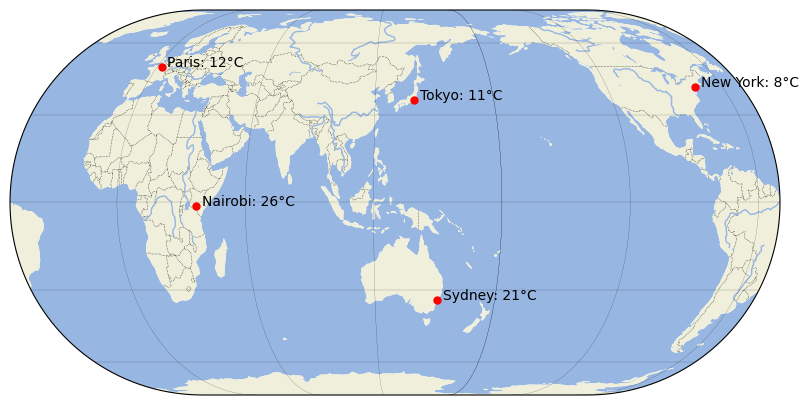

In [9]:
# Quelques données fictives de température pour plusieurs villes
cities = {
    'Paris': {'lon': 2.3312, 'lat': 48.8621, 'temp': 12},
    'New York': {'lon': -73.9906, 'lat': 40.7424, 'temp': 8},
    'Tokyo': {'lon': 139.7635, 'lat': 35.6820, 'temp': 11},
    'Sydney': {'lon': 151.2076, 'lat': -33.8618, 'temp': 21},
    'Nairobi': {'lon': 36.8307, 'lat': -1.2928, 'temp': 26}
}

# Créer une figure avec une projection Eckert IV, recentrée sur le méridien central 130°E
fig, ax = plt.subplots(
    figsize=(10, 5),  # Taille de la figure en pouces
    subplot_kw={'projection': ccrs.EckertIV(central_longitude=130)}  # Projection Eckert IV centrée sur 130°E
)

# Définir l'étendue de la carte à l'échelle mondiale
ax.set_global()

# Ajouter des éléments de base à la carte
ax.add_feature(cfeature.OCEAN, facecolor=cfeature.COLORS['water'])  # Colorer les océans
ax.add_feature(cfeature.LAND, facecolor=cfeature.COLORS['land'])  # Colorer les terres
ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='#000', linewidth=0.4)  # Frontières en pointillés
ax.add_feature(cfeature.LAKES)  # Afficher les lacs
ax.add_feature(cfeature.RIVERS)  # Afficher les rivières

# Ajouter les graticules (lignes de latitude et longitude), sans étiquettes
ax.gridlines(draw_labels=False, color='black', linewidth=0.1)

# Ajouter les villes et leurs températures
for city, data in cities.items():
    lon, lat, temp = data['lon'], data['lat'], data['temp']
    # Placer un point rouge pour chaque ville
    ax.plot(lon, lat, marker='o', color='red', markersize=5, transform=ccrs.PlateCarree())
    # Afficher le nom de la ville et la température à côté du point
    ax.text(lon + 3, lat, f"{city}: {temp}°C", transform=ccrs.PlateCarree(), fontsize=10)

# Afficher la carte
plt.show()

## 7. Une carte un peu moins globale... 🗺️

Il est possible de se concentrer sur une région spécifique en utilisant des projections locales et en définissant une étendue plus restreinte :

/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_lakes.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_rivers_lake_centerlines.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


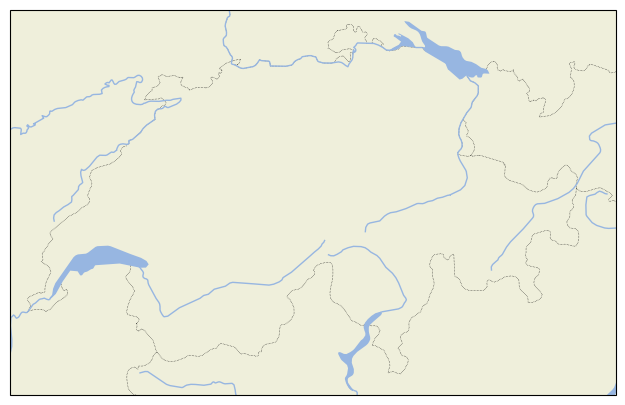

In [10]:
# Créer une figure avec une projection UTM pour la zone 32N
fig, ax = plt.subplots(
    figsize=(10, 5),  # Taille de la figure en pouces
    subplot_kw={'projection': ccrs.UTM(32)}  # Projection UTM pour la zone 32N
)

# Définir l'étendue de la carte pour se concentrer sur une région spécifique
ax.set_extent([5.84, 10.74, 45.7, 47.84], crs=ccrs.PlateCarree())  # Coordonnées en degrés (PlateCarree)

# Ajouter des éléments de base à la carte
ax.add_feature(cfeature.LAND, facecolor=cfeature.COLORS['land'])  # Colorer les terres
ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='#000', linewidth=0.4)  # Frontières en pointillés
ax.add_feature(cfeature.LAKES)  # Afficher les lacs
ax.add_feature(cfeature.RIVERS)  # Afficher les rivières

# Afficher la carte
plt.show()

## 8. Carte des stations météo 🌦️

Nous allons maintenant réaliser un exemple un peu plus complet : une carte des stations météo de MétéoSuisse. Pour cela, nous utiliserons le service WMTS de Swisstopo comme fond de carte et téléchargerons la liste des stations météo depuis le site web de MétéoSuisse.

Afin d’afficher les images provenant d’un service WMTS, Cartopy requiert certains modules supplémentaires. Assurons-nous d’avoir `scipy`, `owslib`, et `Pillow` installés :

In [11]:
!pip install scipy owslib Pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.0/240.0 kB 3.9 MB/s eta 0:00:00


Chargement du [service WMTS de Swisstopo](https://www.geo.admin.ch/fr/wmts-services-et-donnees-disponibles). Nous utilisons ici le service avec la projection Pseudo-Mercator (code EPSG 3857), qui est celle employée par la majorité des cartes Web -- bien que ce ne soit pas toujours le choix le plus optimal.

Nous définissons également le nom de la couche souhaitée. Pour connaître les couches disponibles, une option consiste à configurer QGIS pour se connecter au service WMTS de Swisstopo. La vidéo [« QGIS : Ajouter un service WMS ou WMTS »](https://youtu.be/voNmaJE1HE4) explique comment procéder.

In [ ]:
# URL du document de capacités (Capabilities) du service WMTS de Swisstopo en projection Pseudo-Mercator (EPSG:3857)
wmts_url = 'https://wmts.geo.admin.ch/EPSG/3857/1.0.0/WMTSCapabilities.xml'

# Nom de la couche souhaitée : carte de base légère avec ombrage du relief
lyrname = 'ch.swisstopo.leichte-basiskarte_reliefschattierung'

Nous pouvons maintenant faire une première carte:

In [ ]:
# Définir la carte avec une projection Pseudo-Mercator (EPSG:3857)
fig, ax = plt.subplots(
    figsize=(18, 9),  # Taille de la figure en pouces
    subplot_kw={'projection': ccrs.epsg(3857)}  # Projection Pseudo-Mercator
)

# Définir l'étendue de la carte pour se concentrer sur une zone spécifique en Suisse
ax.set_extent([5.84, 10.74, 45.7, 47.84], crs=ccrs.PlateCarree())  # Coordonnées en degrés (lat/long)

# Ajouter la couche de fond du service WMTS de Swisstopo
ax.add_wmts(wmts_url, layer_name=lyrname, wmts_kwargs={'Time': 'current'})  # Utilise l'instantané actuel

# Afficher la carte
plt.show()

Pour la localisation des stations météo, nous pouvons les trouver dans un fichier JSON disponible à l'URL suivante :
[https://www.meteoschweiz.admin.ch/product/output/measured-values/stationsTable/messnetz-automatisch/stationsTable.messnetz-automatisch.fr.json](https://www.meteoschweiz.admin.ch/product/output/measured-values/stationsTable/messnetz-automatisch/stationsTable.messnetz-automatisch.fr.json)

Il s'agit d'un fichier au format JSON (un format léger et structuré, idéal pour échanger des données). Ce format est facile à lire avec Python. Nous allons le télécharger directement depuis le site Web de MétéoSuisse en utilisant le module Python `requests`. Assurons-nous d'abord que ce module est bien installé :

In [ ]:
!pip install requests

Nous pouvons maintenant télécharger le fichier et ensuite l'interpréter avec `json.loads`. Ceci transforme le fichier JSON en structure Python (un dictionnaire).

In [ ]:
# Importer les modules nécessaires
import json
import requests

# L'URL du fichier
url_stations_meteo = 'https://www.meteoschweiz.admin.ch/product/output/measured-values/stationsTable/messnetz-automatisch/stationsTable.messnetz-automatisch.fr.json'

# Télécharger le fichier en mémoire, le contenu du fichier sera dans la variable `response`
response = requests.get(url_stations_meteo)

# Transformer le contenu du fichier JSON en dictionnaire Python
d = json.loads(response.text)

Il est une bonne idée d'explorer un peu le résultat. Les stations se trouvent dans une liste que nous pouvons obtenir avec `d['stations']`. Voici juste la première:

In [ ]:
stations = d['stations']
stations[0]

Chaque station possède un type spécifique. Explorons les différents types de stations disponibles en les extrayant du fichier JSON :

In [ ]:
st_types = set([st['station_type'] for st in stations])
st_types

Nous allons ajouter uniquement les stations météo et exclure les stations de mesure des précipitations. Passons maintenant à la création de la carte en ajoutant un point pour chaque station météo :

In [ ]:
# Créer une figure avec une projection Pseudo-Mercator (EPSG:3857)
fig, ax = plt.subplots(
    figsize=(18, 9),  # Taille de la figure en pouces
    subplot_kw={'projection': ccrs.epsg(3857)}  # Projection Pseudo-Mercator
)

# Définir l'étendue de la carte pour se concentrer sur une région spécifique
ax.set_extent([5.84, 10.74, 45.7, 47.84], crs=ccrs.PlateCarree())

# Ajouter la couche de fond WMTS de Swisstopo
ax.add_wmts(wmts_url, layer_name=lyrname, wmts_kwargs={'Time': 'current'})  # Carte actuelle

# Ajouter un point pour chaque station météo
for st in stations:
    # Extraire les coordonnées en latitude/longitude pour chaque station
    latlong = st['latlong']
    y, x = latlong

    # Utiliser l'identifiant de la station comme nom pour l'affichage (plus court)
    nom = st['id']

    # Placer un point rouge pour chaque station
    ax.plot(x, y, marker='o', color='red', markersize=5, transform=ccrs.PlateCarree())

    # Annoter chaque point avec le nom de la station
    ax.text(x, y, nom, fontsize=8, ha='right', transform=ccrs.PlateCarree())

# Définir un titre pour la carte
plt.title('Stations météo de MétéoSuisse')

# Afficher la carte
plt.show()

La carte n'est certainement pas très lisible. Beaucoup de noms de stations se superposent, et il n'est pas simple de résoudre ce problème, car Cartopy ne propose aucune option pour l'éviter. Nous pouvons cependant utiliser le module `adjustText` pour améliorer un peu la situation. Bien que cela ne résolve pas entièrement le problème, cela permettra au moins d'éviter le chevauchement des étiquettes, même si les points eux-mêmes ne seront pas pris en compte.

In [ ]:
!pip install adjustText

In [ ]:
from adjustText import adjust_text

# Créer une figure avec une projection Pseudo-Mercator (EPSG:3857)
fig, ax = plt.subplots(
    figsize=(18, 9),  # Taille de la figure en pouces
    subplot_kw={'projection': ccrs.epsg(3857)}  # Projection Pseudo-Mercator
)

# Définir l'étendue de la carte pour une zone spécifique
ax.set_extent([5.84, 10.74, 45.7, 47.84], crs=ccrs.PlateCarree())

# Ajouter la couche de fond WMTS de Swisstopo
ax.add_wmts(wmts_url, layer_name=lyrname, wmts_kwargs={'Time': 'current'})  # Carte actuelle

# Liste pour stocker les objets de texte (étiquettes) des stations
labels = []
for st in stations:
    # Extraire les coordonnées en latitude/longitude pour chaque station
    latlong = st['latlong']
    y, x = latlong

    # Utiliser l'identifiant de la station comme nom pour l'affichage (plus court)
    nom = st['id']

    # Placer un point rouge pour chaque station
    ax.plot(x, y, marker='o', color='red', markersize=5, transform=ccrs.PlateCarree())

    # Annoter chaque point avec le nom de la station
    lbl = ax.text(x, y, nom, fontsize=8, ha='right', transform=ccrs.PlateCarree())
    labels.append(lbl)  # Ajouter chaque étiquette à la liste pour ajustement

# Ajuster les positions des étiquettes pour réduire les chevauchements
adjust_text(labels, ax=ax, expand_points=(1.2, 1.2), expand_text=(1.2, 1.2),
            arrowprops=dict(arrowstyle='->', color='gray'))  # Flèches pour indiquer les étiquettes ajustées

# Définir un titre pour la carte
plt.title('Stations météo de MétéoSuisse')

# Afficher la carte
plt.show()